# IRIS FLOWER CLASSIFICATION
The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.
Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [4]:
df=pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Check for missing values

In [14]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Checking Correlation

In [10]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


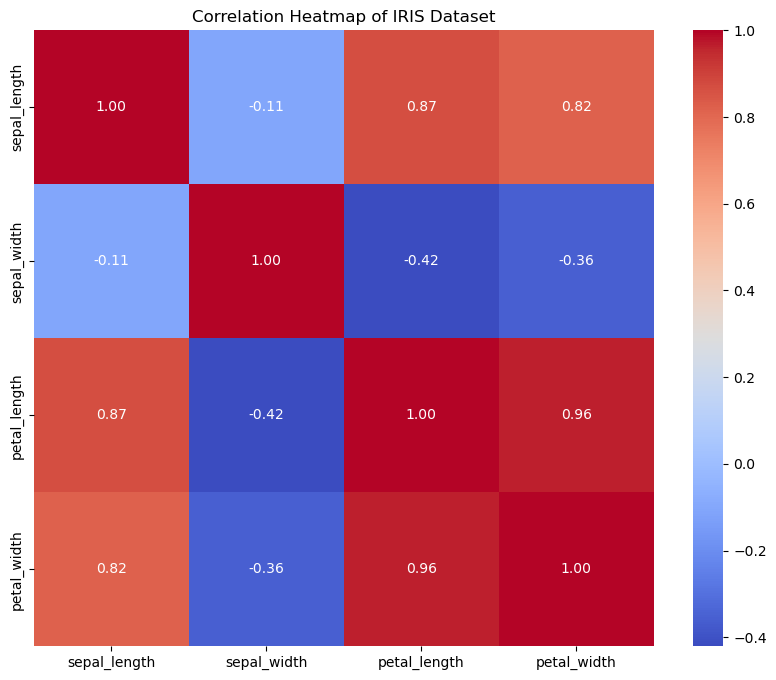

In [11]:
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of IRIS Dataset')
plt.show()

# Visualization

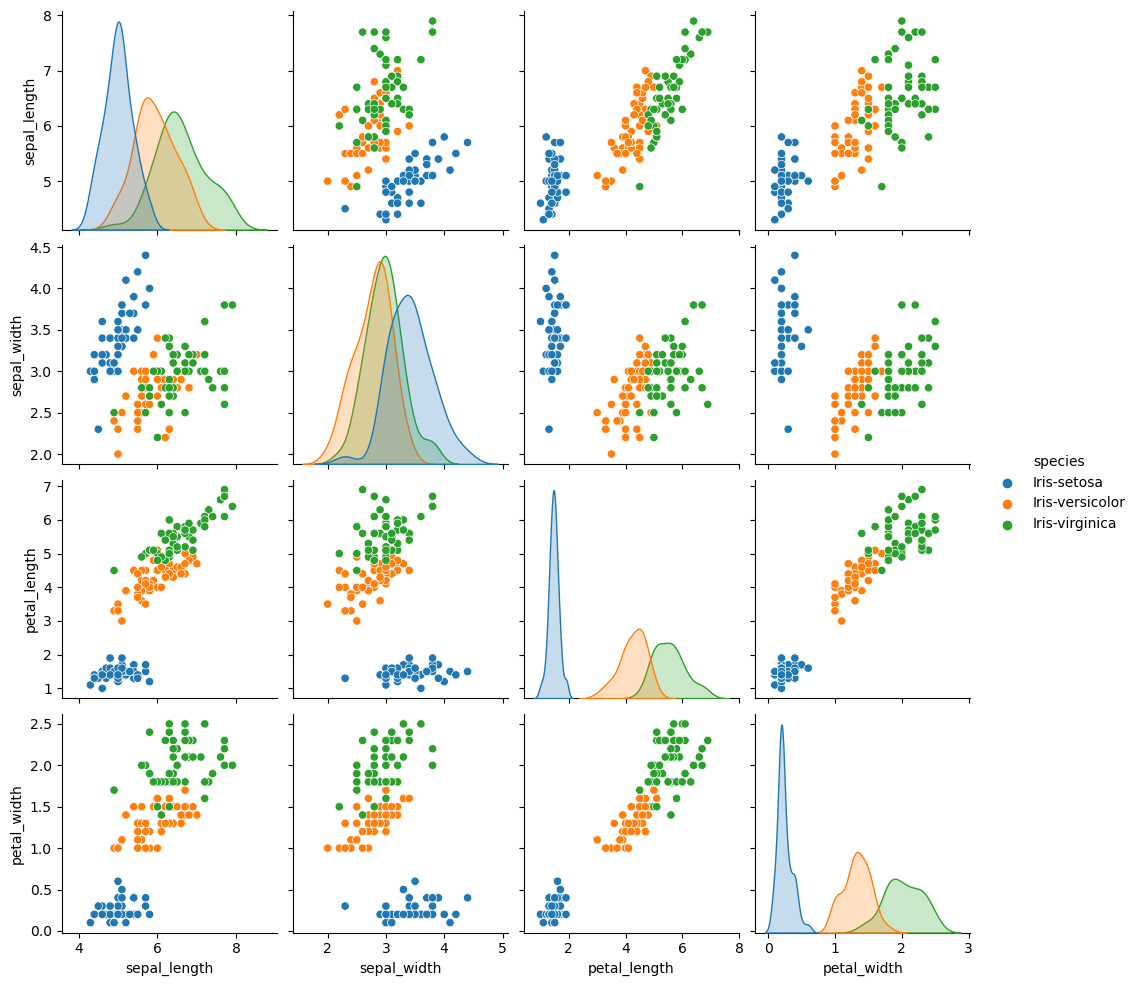

In [16]:
sns.pairplot(df, hue='species')
plt.show()

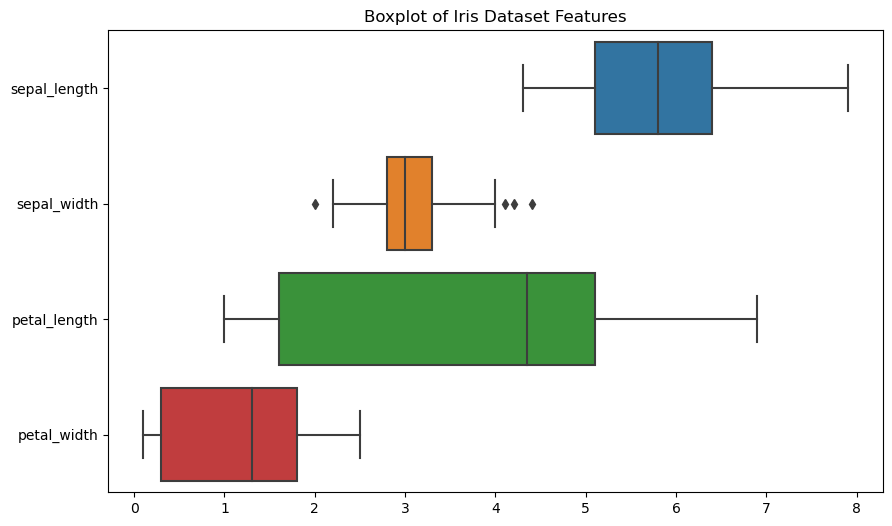

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Iris Dataset Features')
plt.show()

# Dataset Splitting

In [21]:
X = df.drop('species', axis=1) 
y = df['species']  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Development
## Random Forest Classifier
We decided to use the Random Forest Classifier for flower classification, an ensemble learning method that constructs multiple decision trees and combines their predictions to improve performance and reduce overfitting.

In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


## Accuracy¶
The accuracy of the Random Forest Classifier on the testing data is 1.0, meaning that all samples in the testing dataset were correctly classified into their respective species. This indicates that the model generalizes well to unseen data and effectively distinguishes between different species of Iris flowers based on their sepal and petal measurements.

## Conclusion
The high accuracy achieved by the Random Forest Classifier demonstrates its effectiveness in flower classification using the Iris dataset. This result reinforces the suitability of the Random Forest algorithm for this classification task.

In [24]:
predictions = model.predict(X_test)

for i, prediction in enumerate(predictions):
    print(f"Sample {i+1}: Predicted Species - {prediction}")

Sample 1: Predicted Species - Iris-versicolor
Sample 2: Predicted Species - Iris-setosa
Sample 3: Predicted Species - Iris-virginica
Sample 4: Predicted Species - Iris-versicolor
Sample 5: Predicted Species - Iris-versicolor
Sample 6: Predicted Species - Iris-setosa
Sample 7: Predicted Species - Iris-versicolor
Sample 8: Predicted Species - Iris-virginica
Sample 9: Predicted Species - Iris-versicolor
Sample 10: Predicted Species - Iris-versicolor
Sample 11: Predicted Species - Iris-virginica
Sample 12: Predicted Species - Iris-setosa
Sample 13: Predicted Species - Iris-setosa
Sample 14: Predicted Species - Iris-setosa
Sample 15: Predicted Species - Iris-setosa
Sample 16: Predicted Species - Iris-versicolor
Sample 17: Predicted Species - Iris-virginica
Sample 18: Predicted Species - Iris-versicolor
Sample 19: Predicted Species - Iris-versicolor
Sample 20: Predicted Species - Iris-virginica
Sample 21: Predicted Species - Iris-setosa
Sample 22: Predicted Species - Iris-virginica
Sample 23

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression model:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy of Logistic Regression model: 1.0

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


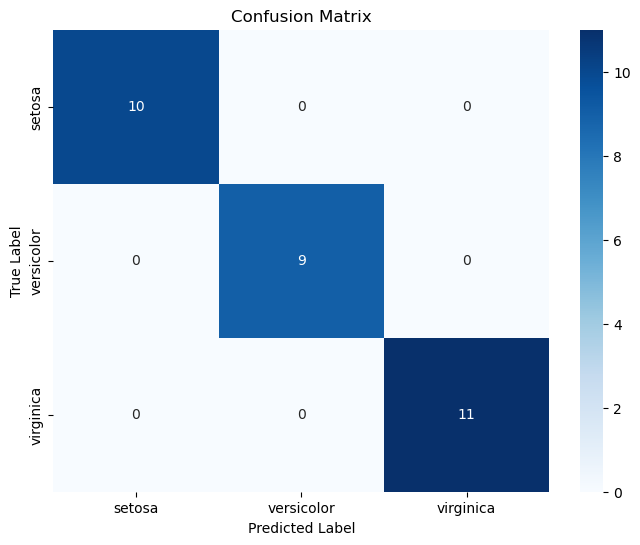

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have trained your model and obtained predictions
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
iris_target_names = ['setosa', 'versicolor', 'virginica']

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=iris_target_names, columns=iris_target_names)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



These predictions provide insights into how the trained model classified each sample into one of the three Iris species. They demonstrate the effectiveness of the model in distinguishing between different species based on their sepal and petal measurements.